In [5]:
# petrol_consumption.csv
# location: https://mitu.co.in/dataset

# import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/petrol_consumption.csv')


In [4]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [16]:
df.shape

(48, 5)

In [6]:
#input feature
x = df.drop('Petrol_Consumption', axis=1)

#output feature
y =df['Petrol_Consumption']

# Cross Validation

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [8]:
x_train.shape

(36, 4)

In [11]:
x_test.shape

(12, 4)

# Build the model

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
reg_rf = RandomForestRegressor(random_state=0, n_estimators=5)

In [19]:
reg_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

# Performance Evaluation

In [41]:
y_pred = reg_rf.predict(x_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
#from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [55]:
mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)

(69.36666666666666, 0.13400377060195362)

In [56]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
29,534,550.0
4,410,553.0
26,577,645.2
30,571,652.6
32,577,645.8
37,704,646.0
34,487,641.8
40,587,560.6
7,467,440.0
10,580,638.0


In [57]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

81.45100776949704

In [46]:
reg_rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=209652396),
 DecisionTreeRegressor(max_features=1.0, random_state=398764591),
 DecisionTreeRegressor(max_features=1.0, random_state=924231285),
 DecisionTreeRegressor(max_features=1.0, random_state=1478610112),
 DecisionTreeRegressor(max_features=1.0, random_state=441365315)]

In [47]:
# visualize

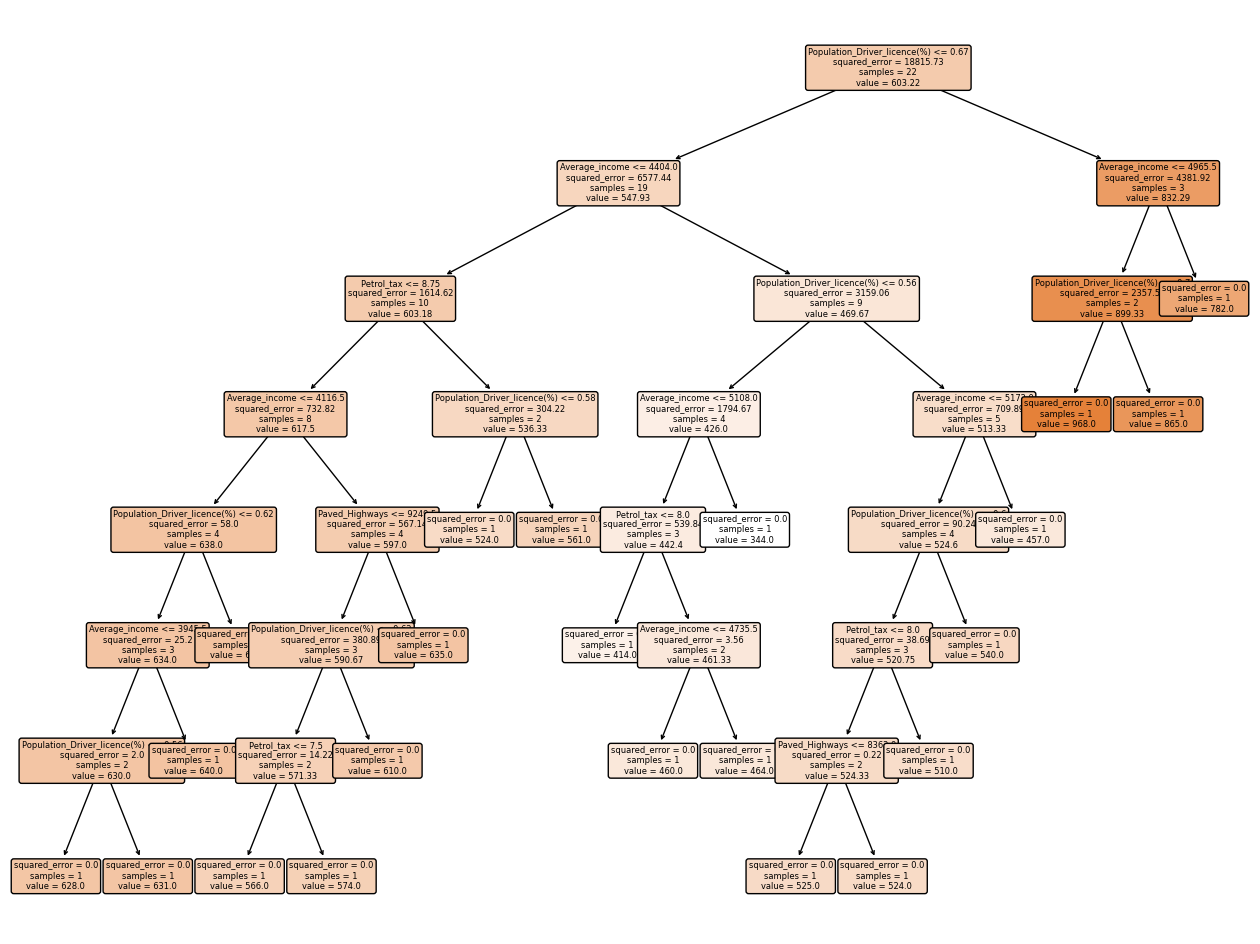

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,12))
plot_tree(reg_rf.estimators_[3], fontsize=6, feature_names=x.columns,
         filled= True, precision=2, rounded=True);


#plt.savefig('tree_ensemble.png') # save this img to the current directory